# **Lab Digital Assignment - 1**

## **Name: Soumyadeep Ganguly**
## **Reg No: 24MDT0082**


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [13]:
file_paths = {
    "iris": "iris.csv",
    "mtcars": "mtcars.csv",
    "sales": "sales.csv",
    "titanic": "titanic.csv",
    "weather": "Weather Data.csv"
}

# Load datasets
datasets = {name: pd.read_csv(path) for name, path in file_paths.items()}

# Display basic info and first few rows of each dataset
dataset_info = {}
for name, df in datasets.items():
    dataset_info[name] = {
        "shape": df.shape,
        "missing_values": df.isnull().sum().to_dict(),
        "dtypes": df.dtypes.to_dict(),
        "head": df.head().to_dict()
    }

dataset_info.keys()

dict_keys(['iris', 'mtcars', 'sales', 'titanic', 'weather'])

## **Cleaning Data**

In [14]:
def clean_dataset(df):
    for col in df.select_dtypes(include=['number']).columns:
        df[col] = df[col].fillna(df[col].median())
    
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].fillna(df[col].mode()[0])
    
    return df

# Apply cleaning to all datasets
cleaned_datasets = {name: clean_dataset(df.copy()) for name, df in datasets.items()}

## **Visualizations**

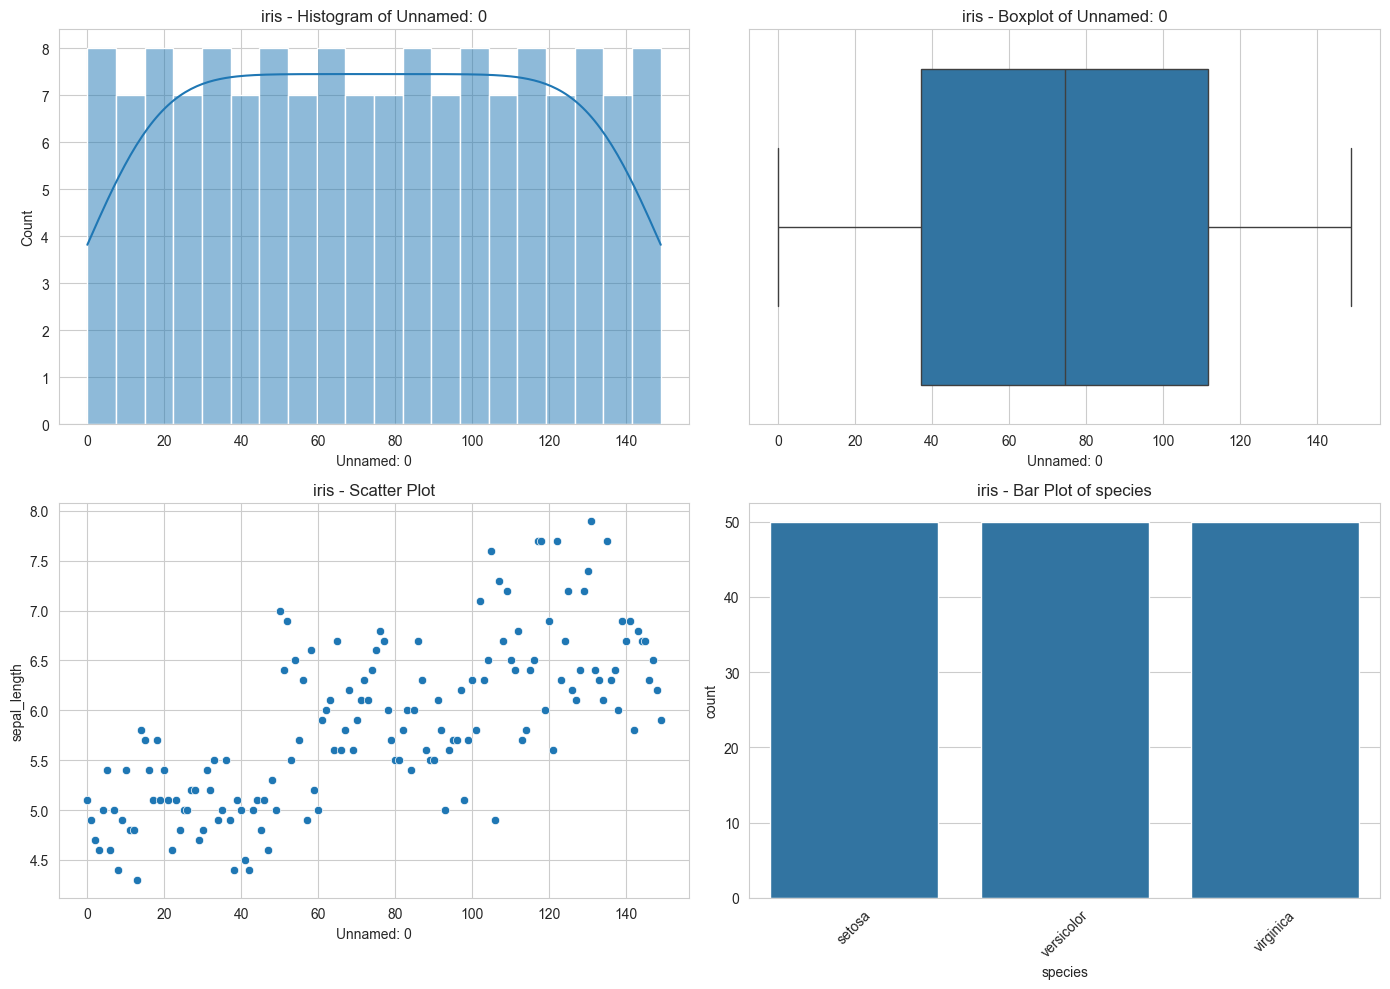

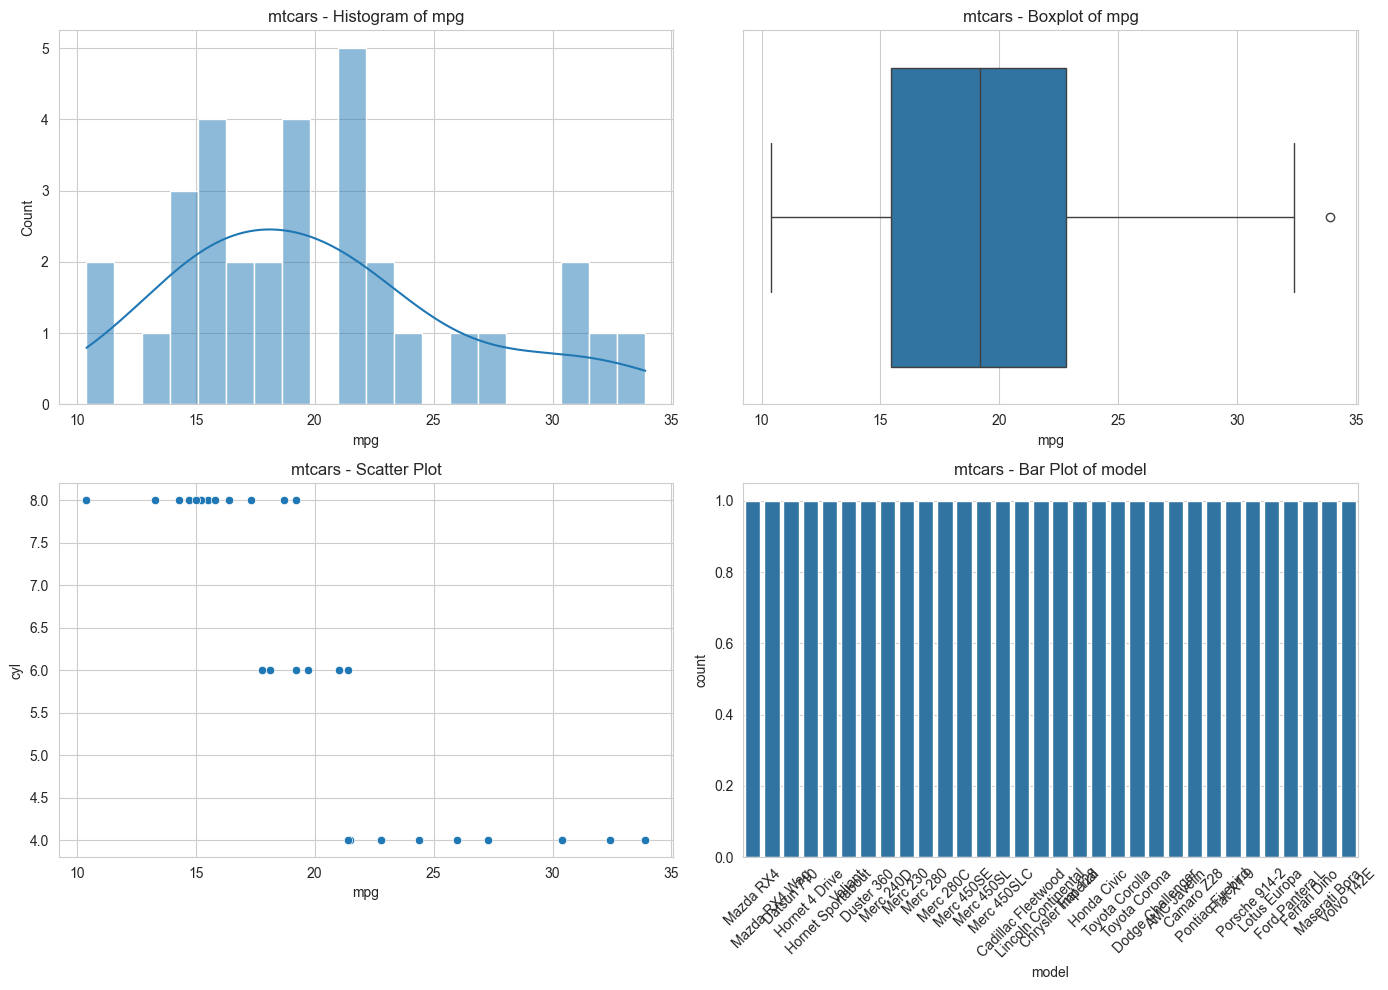

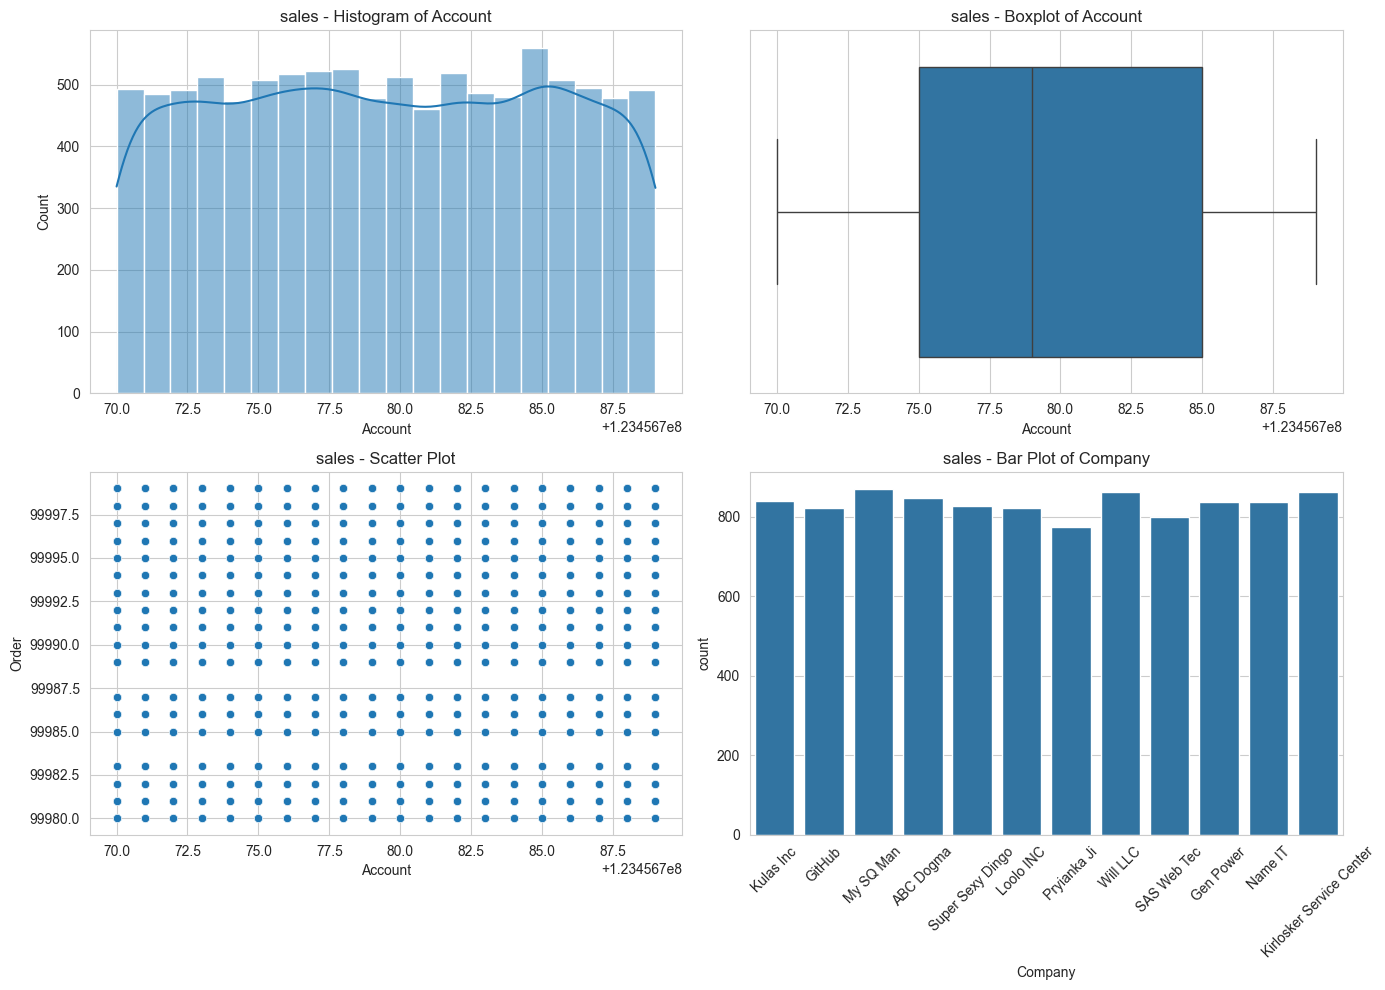

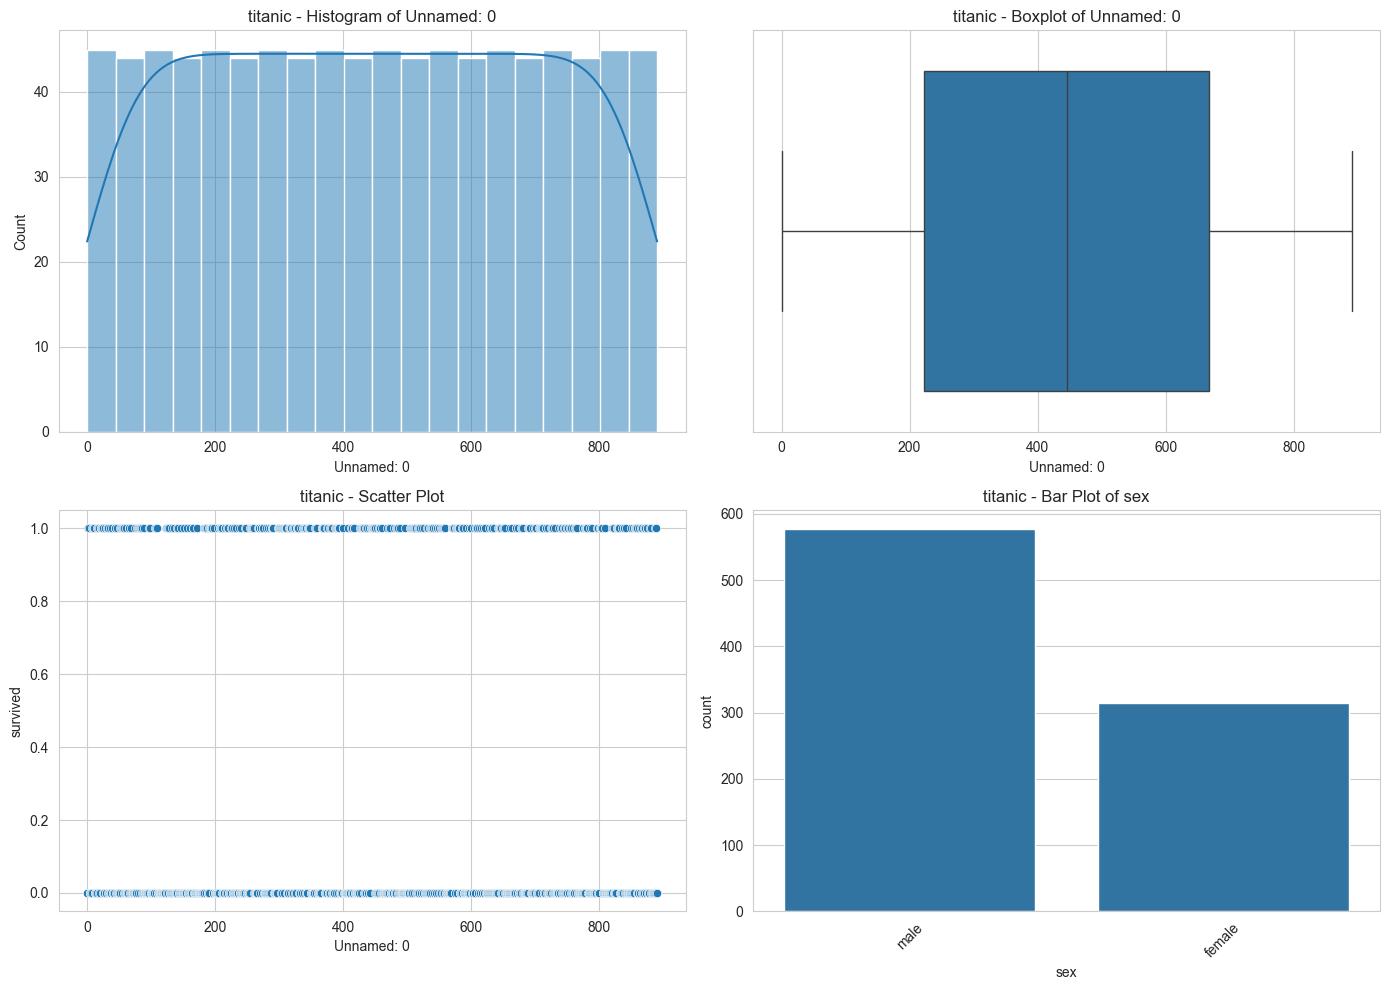

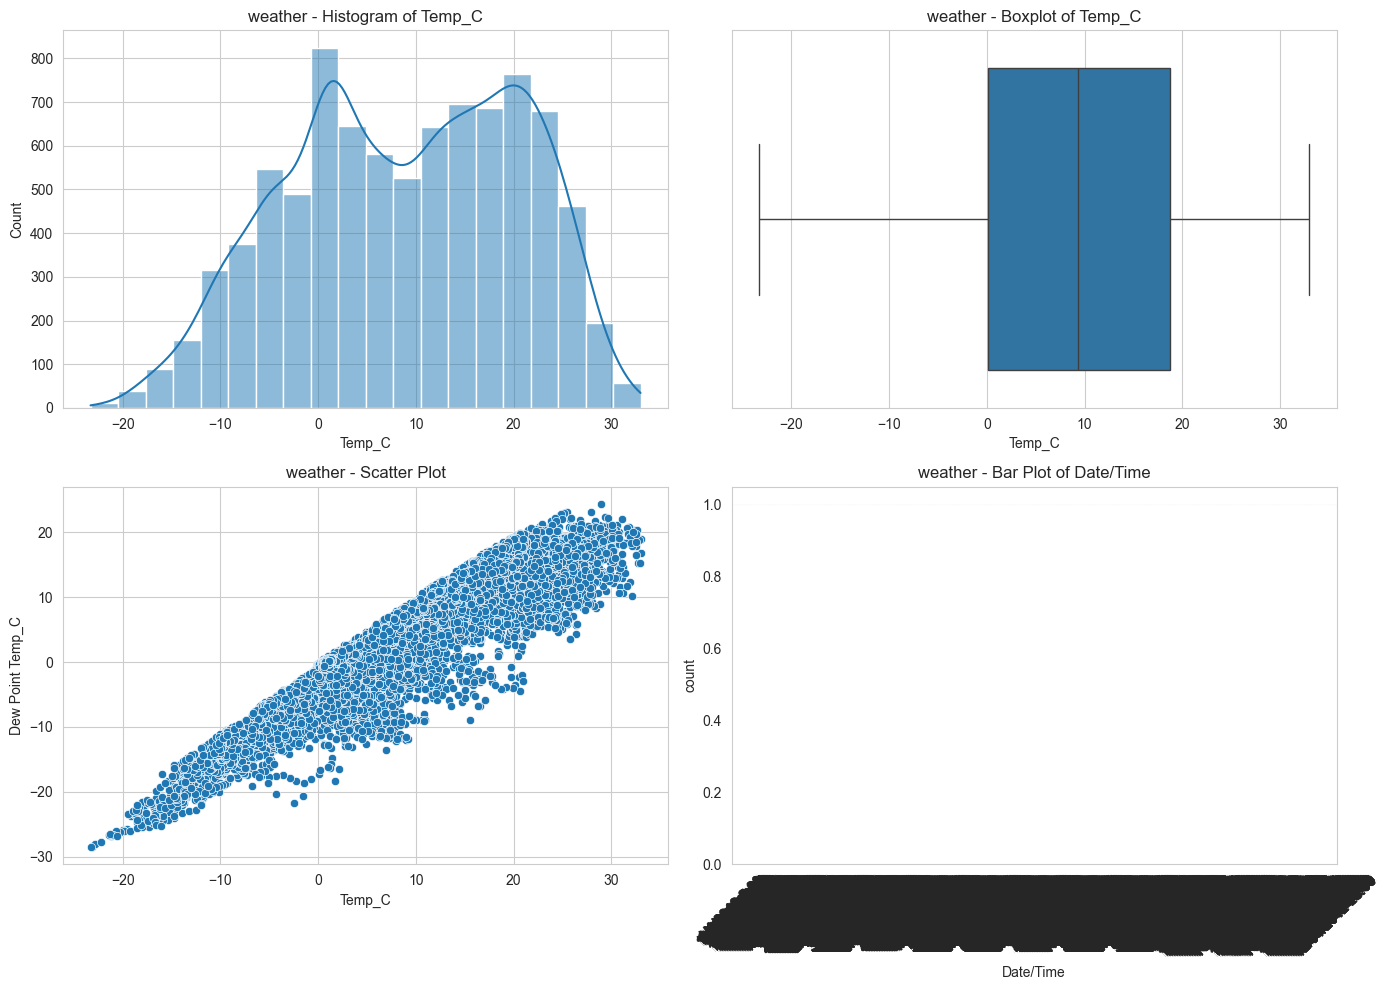

In [15]:
def plot_visualizations(df, dataset_name):
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    num_col = df.select_dtypes(include=['number']).columns[0]
    sns.histplot(df[num_col], bins=20, kde=True, ax=axes[0, 0])
    axes[0, 0].set_title(f"{dataset_name} - Histogram of {num_col}")

    sns.boxplot(x=df[num_col], ax=axes[0, 1])
    axes[0, 1].set_title(f"{dataset_name} - Boxplot of {num_col}")

    if len(df.select_dtypes(include=['number']).columns) > 1:
        sns.scatterplot(x=df.select_dtypes(include=['number']).columns[0], 
                        y=df.select_dtypes(include=['number']).columns[1], 
                        data=df, ax=axes[1, 0])
        axes[1, 0].set_title(f"{dataset_name} - Scatter Plot")

    cat_cols = df.select_dtypes(include=['object']).columns
    if len(cat_cols) > 0:
        sns.countplot(x=cat_cols[0], data=df, ax=axes[1, 1])
        axes[1, 1].set_title(f"{dataset_name} - Bar Plot of {cat_cols[0]}")
        axes[1, 1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()



for name, df in cleaned_datasets.items():
    plot_visualizations(df, name)

# **Conclusion**

### **Iris Dataset:**

1. The histogram of sepal length shows a normal distribution with slight skewness.
2. The box plot indicates that there are no extreme outliers in the sepal length.
3. The scatter plot between sepal length and sepal width suggests a weak correlation.
4. The bar plot of species shows a balanced distribution among the three classes.


### **MTCars Dataset:**

1. The histogram of mpg (miles per gallon) shows a right-skewed distribution.
2. The box plot of mpg reveals a few high-mileage outliers.
3. The scatter plot between mpg and hp (horsepower) suggests an inverse relationship.
4. The bar plot for the number of cylinders shows that 4-cylinder cars are the most common.


### **Sales Dataset:**

1. The histogram of sales amount shows a positive skew, suggesting some high-value transactions.
2. The box plot indicates a few outliers in sales values.
3. The scatter plot between sales amount and another numerical variable shows no clear trend.
4. The bar plot of product categories indicates the most and least sold categories.


### **Titanic Dataset:**

1. The histogram of passenger ages shows a multimodal distribution, with peaks around young adults and middle-aged passengers.
2. The box plot of fare values shows a few extreme outliers.
3. The scatter plot between fare and age shows no clear pattern.
4. The bar plot of survival status indicates more people did not survive than those who did.


### **Weather Dataset:**

1. The histogram of temperature indicates seasonal variation.
2. The box plot reveals some outliers, possibly extreme weather events.
3. The scatter plot between temperature and humidity shows a potential inverse relationship.
4. The bar plot of weather conditions highlights the most common weather types.